<a href="https://colab.research.google.com/github/MahiLak-AI/DogsVsCatsusingCNN/blob/main/Breastcancerdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




Reading Data from the dataset as dataframe


In [ ]:
df=pd.read_csv("/content/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#Finding null values and duplicates in the dataset
df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df.duplicated().sum()

0

There are no null values and no duplicates

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
#As the id column has no use we may as well drop the id column as it of no use to data analysis
df.drop(columns=['id'],inplace=True)
df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Univariate Analysis


<Axes: xlabel='diagnosis', ylabel='count'>

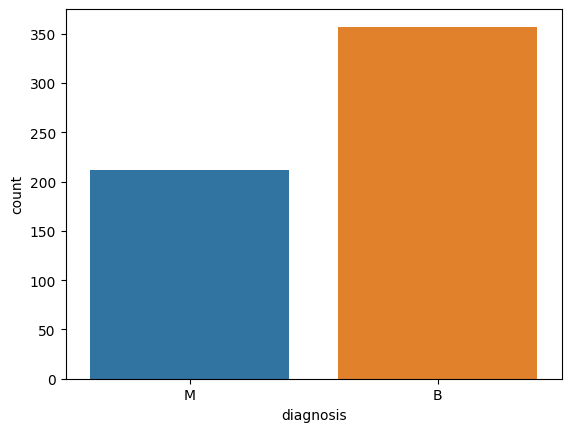

In [ ]:
sns.countplot(x=df["diagnosis"],data=df,hue=df["diagnosis"])

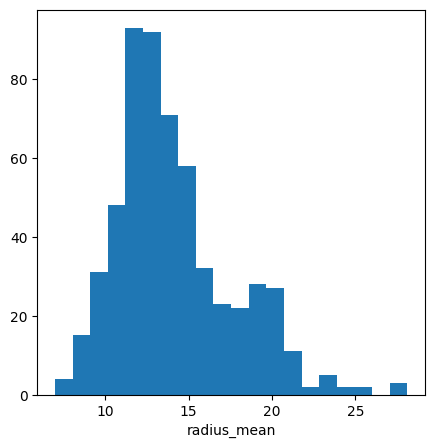

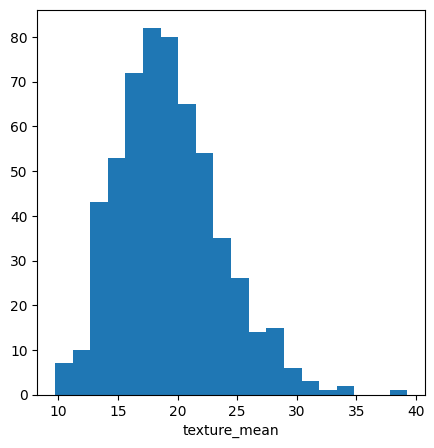

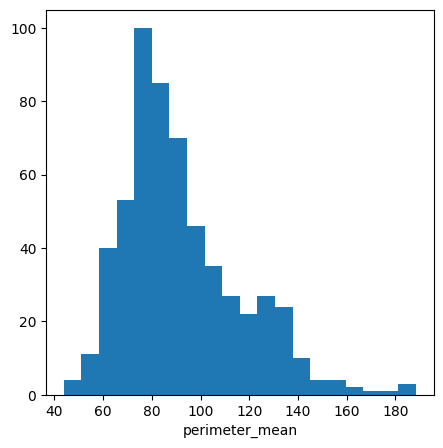

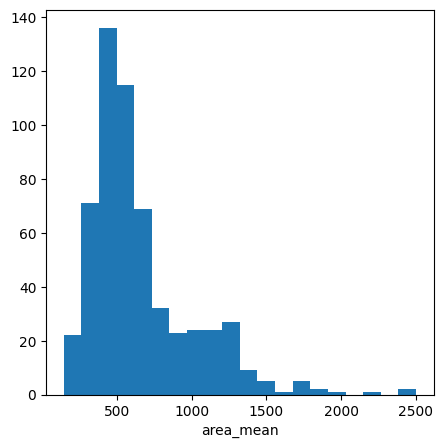

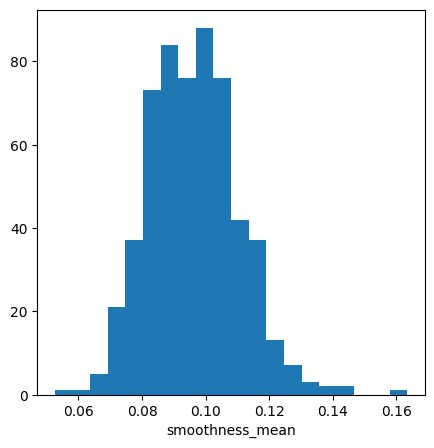

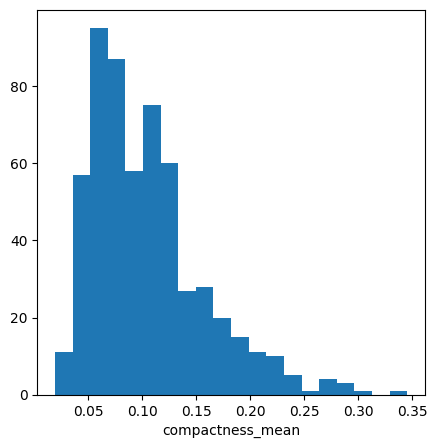

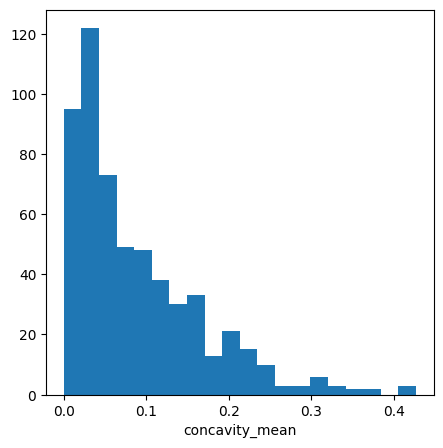

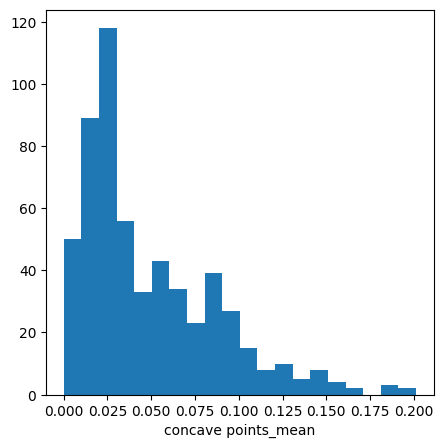

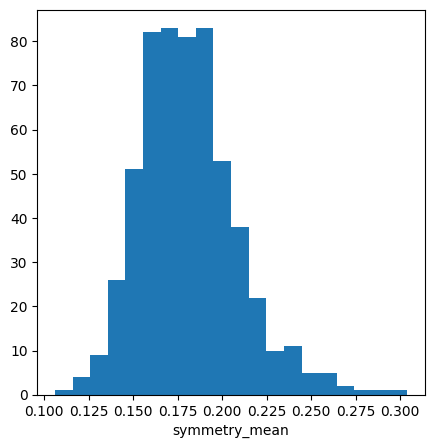

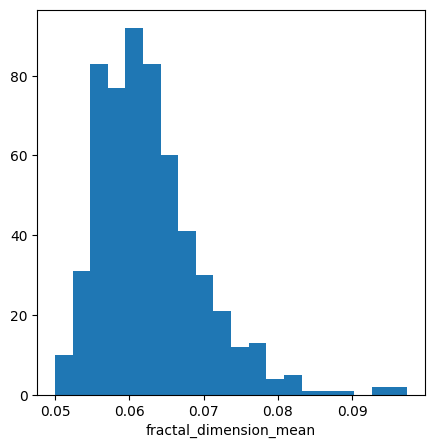

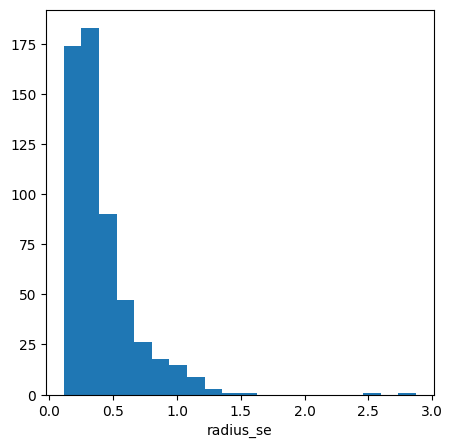

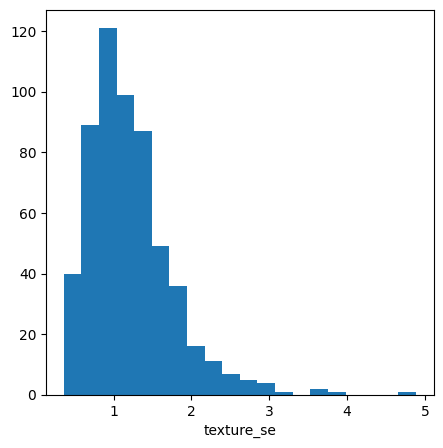

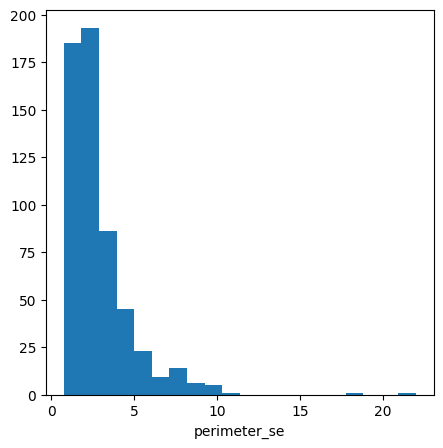

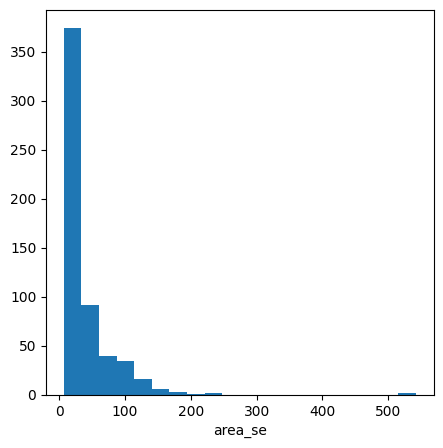

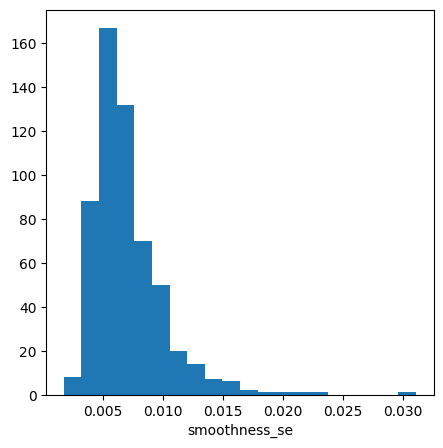

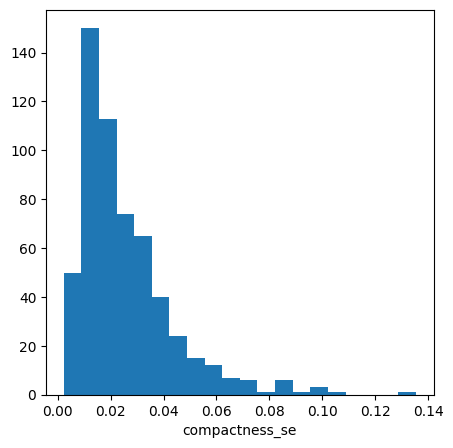

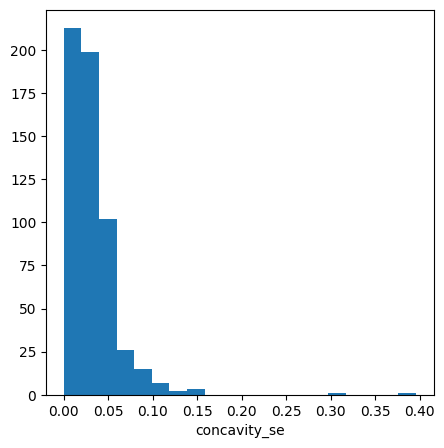

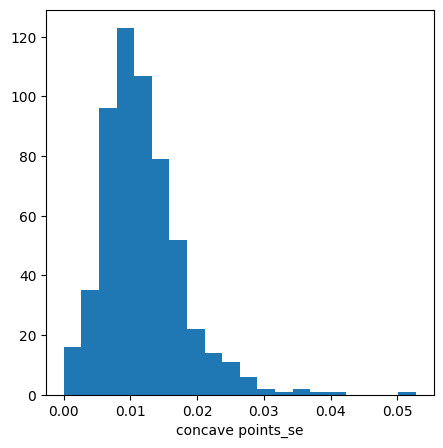

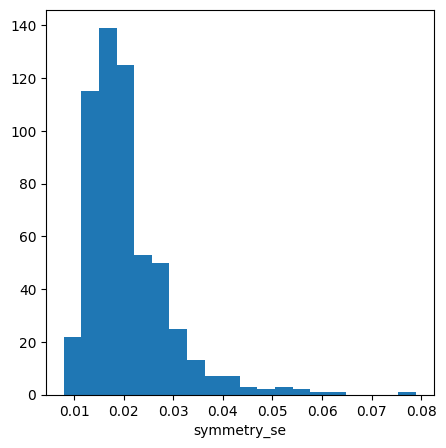

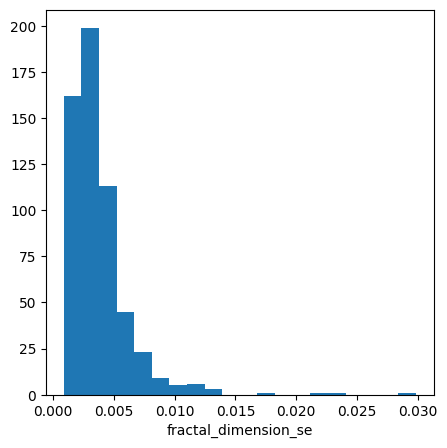

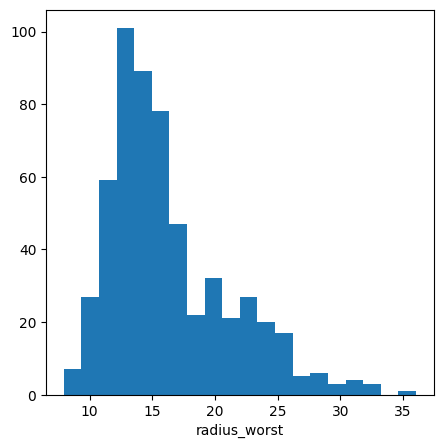

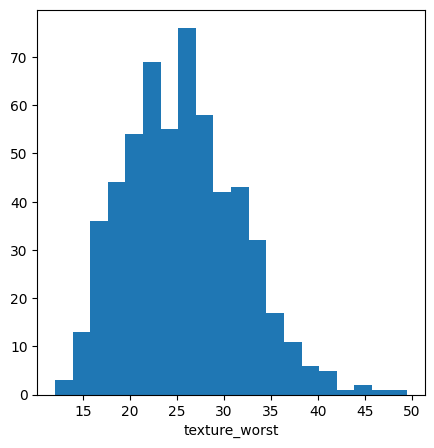

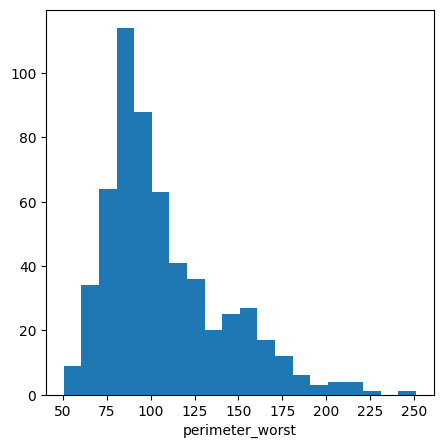

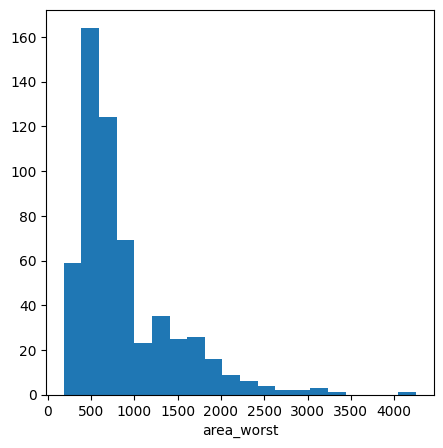

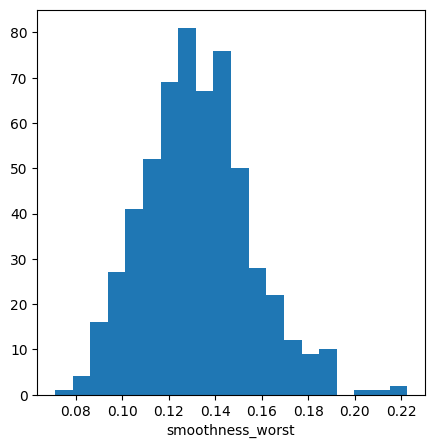

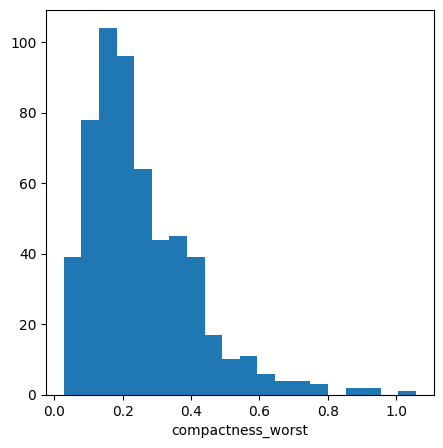

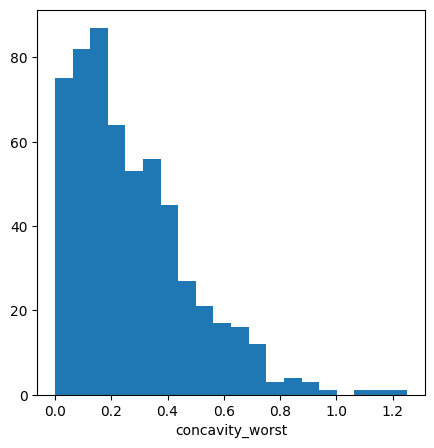

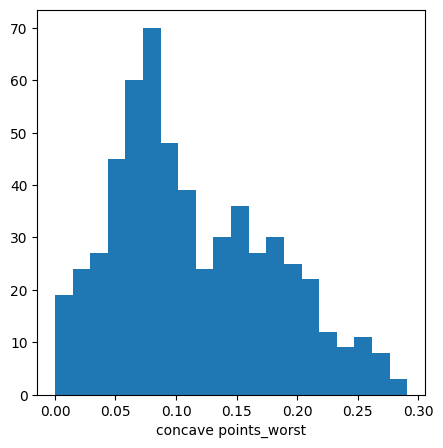

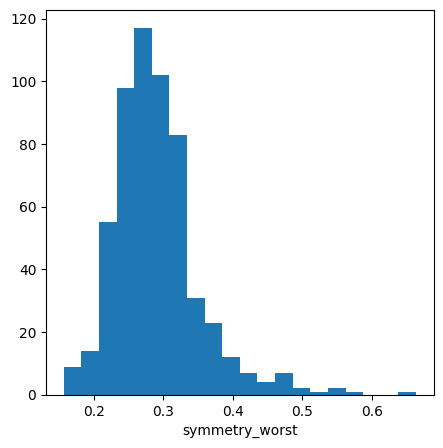

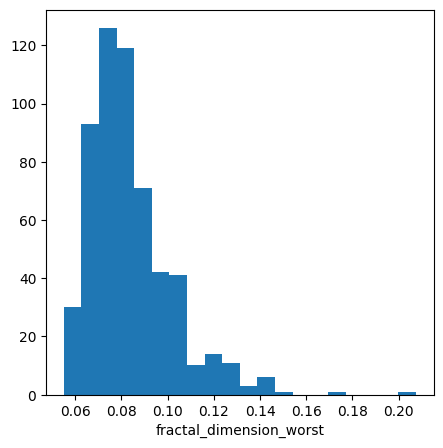

In [ ]:
columns=df.columns
for i in range(1,len(columns)):
  plt.figure(figsize=(5,5))
  plt.hist(df[columns[i]],bins=20)
  plt.xlabel(columns[i])
  plt.show()


In [ ]:
sns.pairplot(df)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x79a84389f060> (for post_execute):


KeyboardInterrupt: 

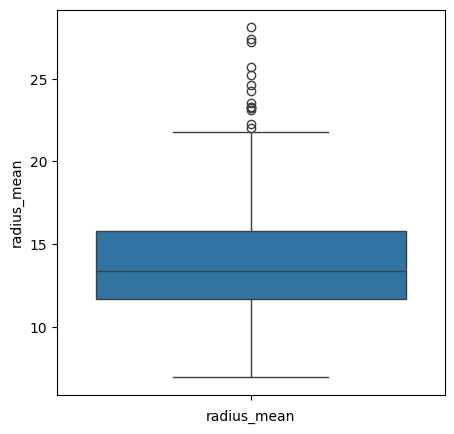

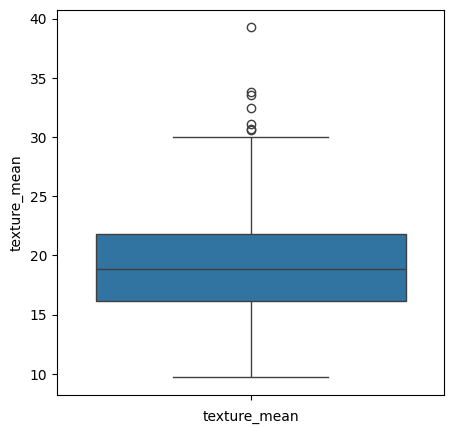

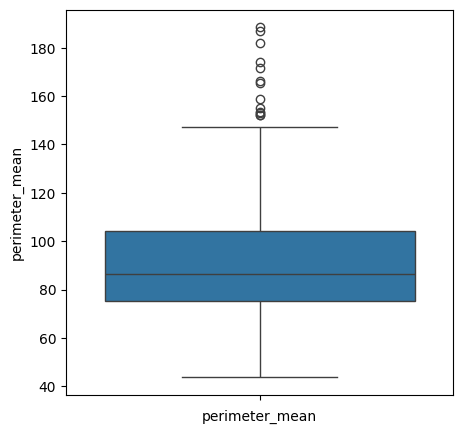

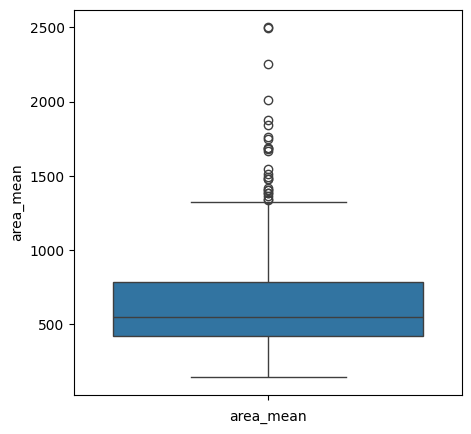

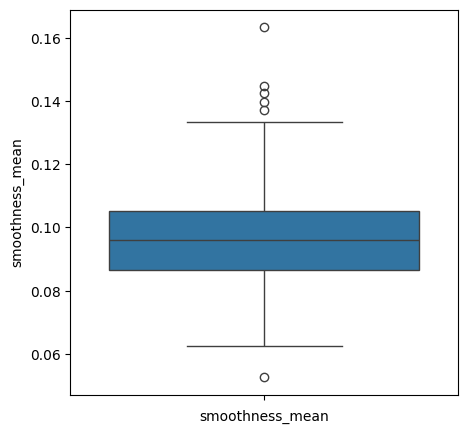

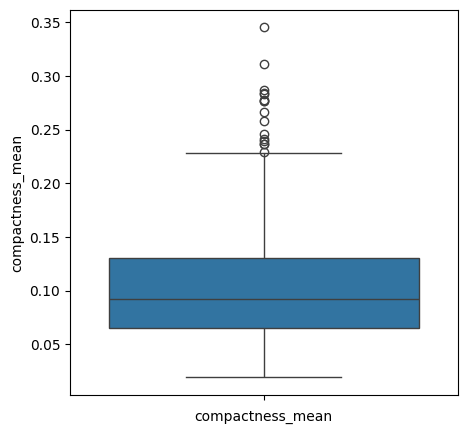

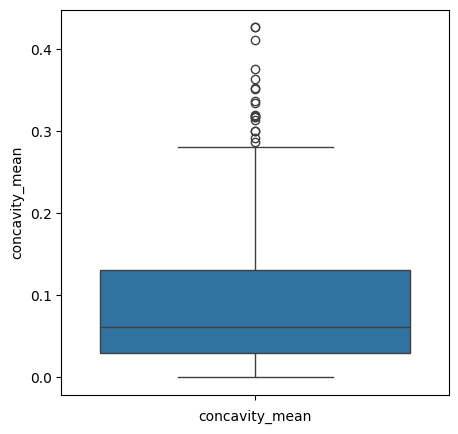

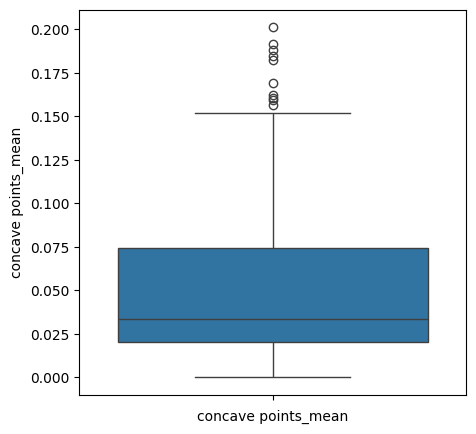

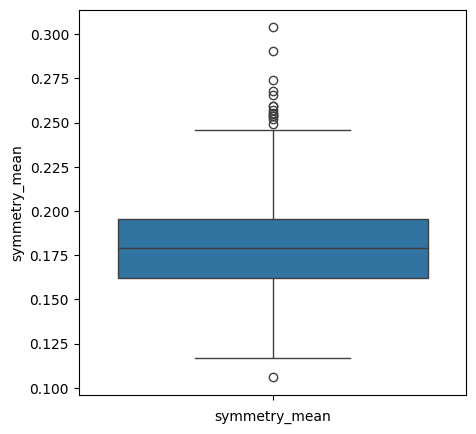

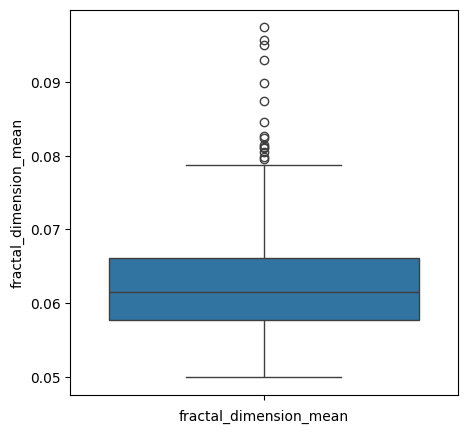

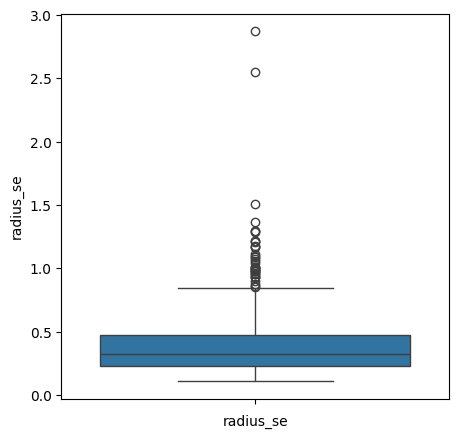

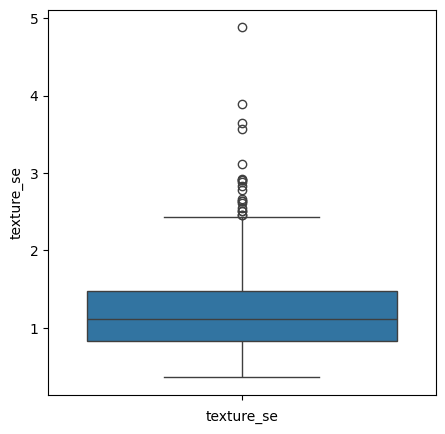

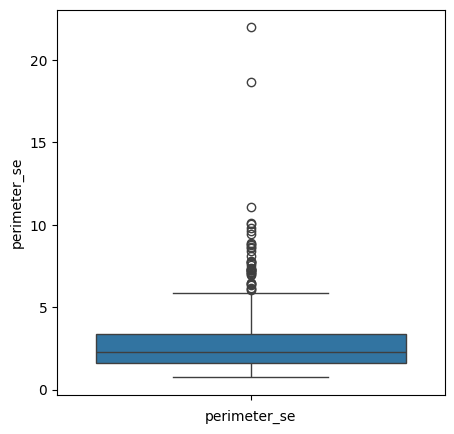

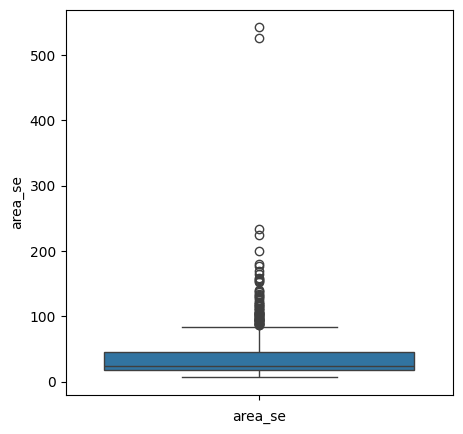

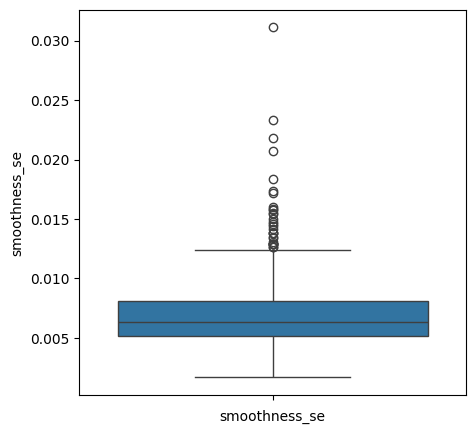

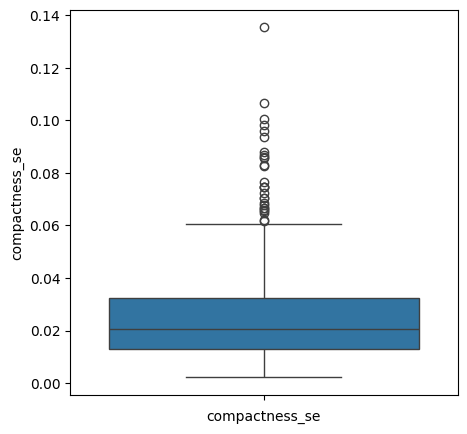

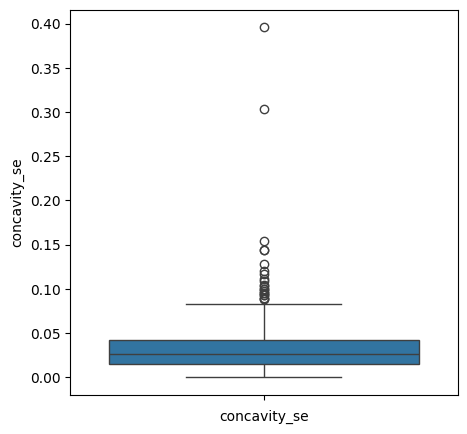

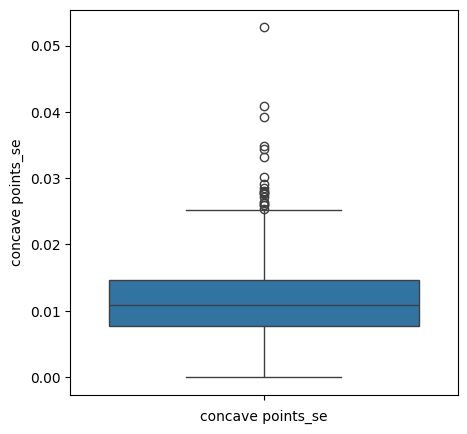

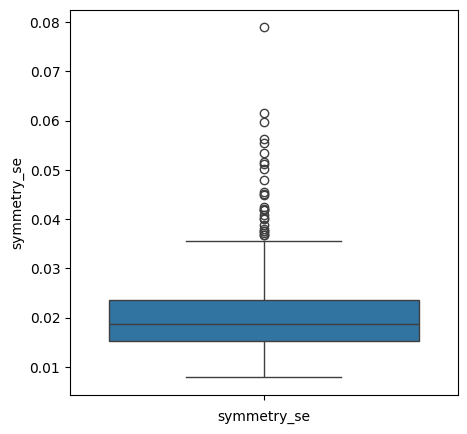

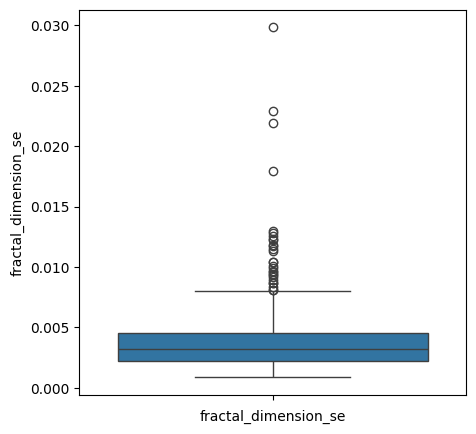

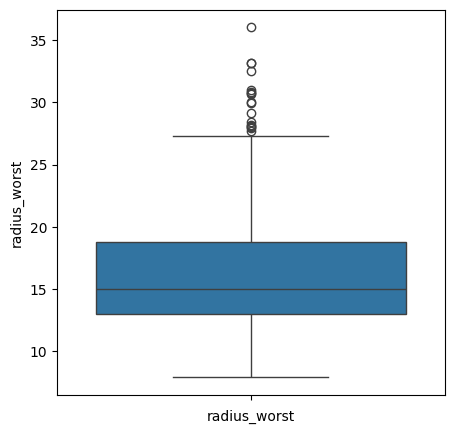

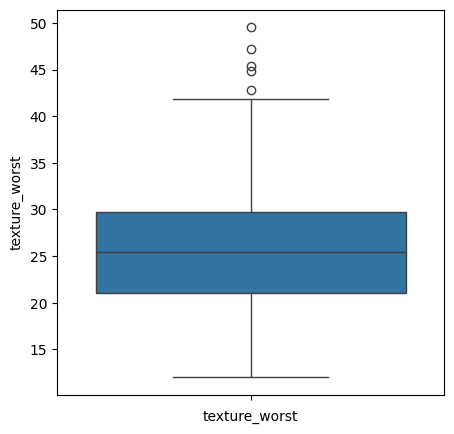

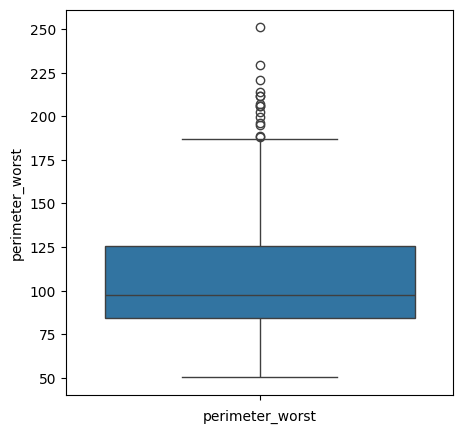

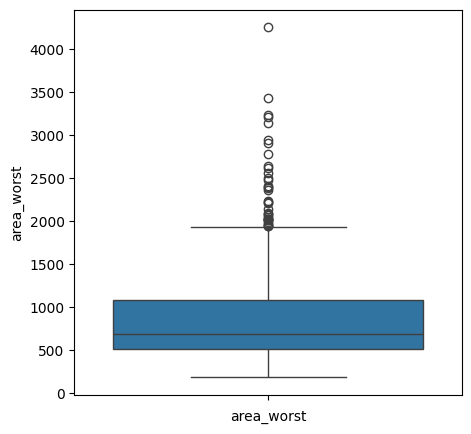

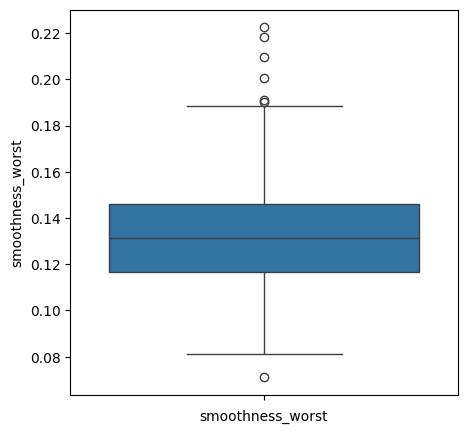

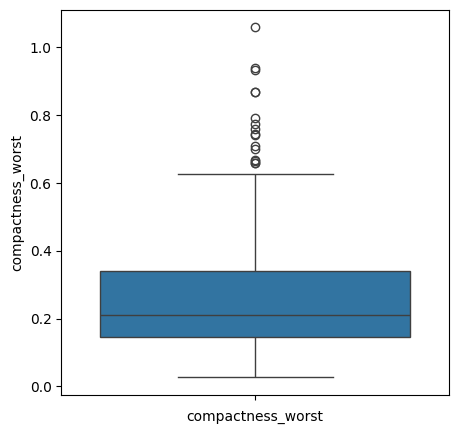

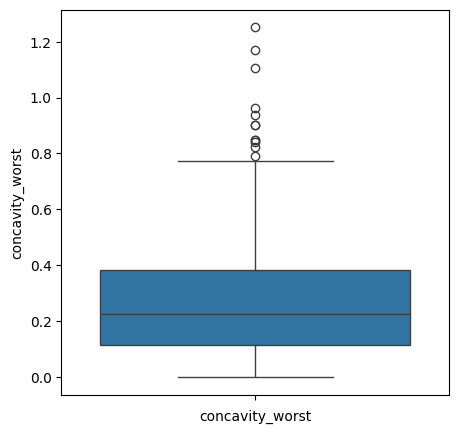

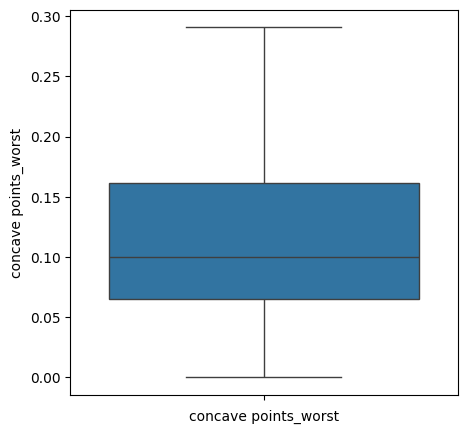

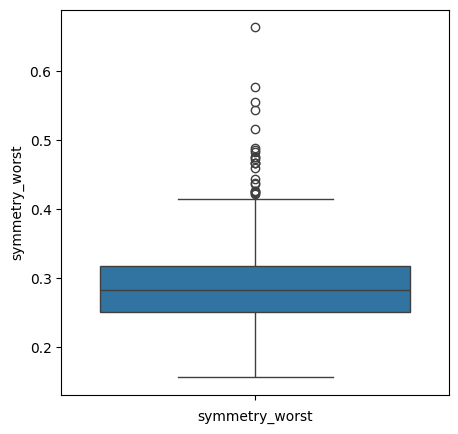

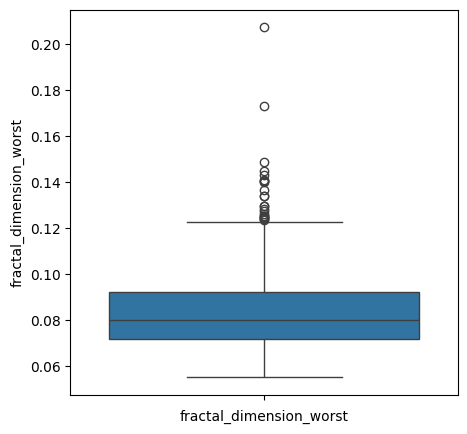

In [ ]:
#Checking for outliers
for i in range(1,len(columns)):
  plt.figure(figsize=(5,5))
  sns.boxplot(df[columns[i]])
  plt.xlabel(columns[i])
  plt.show()

In [ ]:
#Though there are many outliers, for medical data it is not wise to remove the outliers as it may convey some meaningful insight

In [ ]:
#Encoding the target variable
df["diagnosis"].value_counts()
df["diagnosis"] = df["diagnosis"].map({"B":0,"M":1})
df["diagnosis"].value_counts()

,count
diagnosis,
0,357
1,212


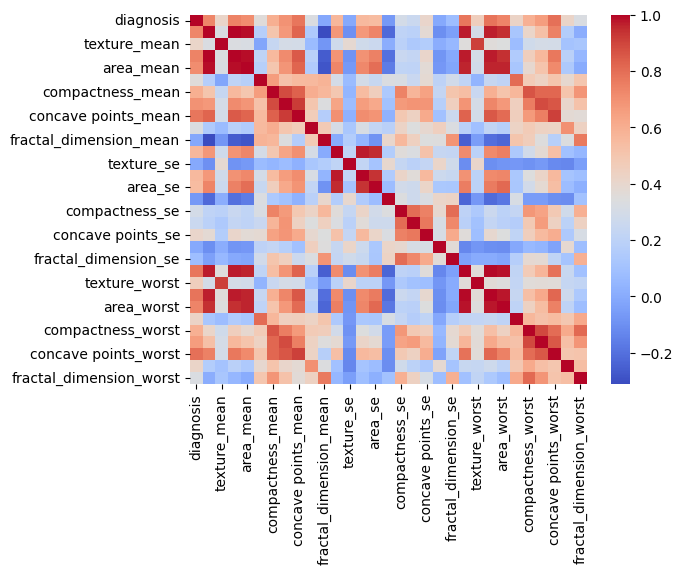

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()

In [ ]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
df.groupby("diagnosis").mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [ ]:
#Splitting feature and target variable
X=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [ ]:
#Splitting train and test data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
#Standardising Train data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train.shape,X_test.shape



((455, 30), (114, 30))

In [ ]:
#importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)


In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(2, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
#training the neural network
history=model.fit(X_train,y_train,validation_split=0.1,epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6971 - loss: 0.6041 - val_accuracy: 0.8261 - val_loss: 0.3954
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8216 - loss: 0.4154 - val_accuracy: 0.8696 - val_loss: 0.2986
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8885 - loss: 0.3141 - val_accuracy: 0.9130 - val_loss: 0.2475
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9167 - loss: 0.2542 - val_accuracy: 0.9130 - val_loss: 0.2175
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9344 - loss: 0.2152 - val_accuracy: 0.9348 - val_loss: 0.1970
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9431 - loss: 0.1875 - val_accuracy: 0.9348 - val_loss: 0.1816
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9522 - loss: 0.1667 - val_accuracy: 0.9348 - val_loss: 0.1694
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9603 - loss: 0.1504 - val_accuracy: 0.9348 -

<ipython-input-30-dcfbcf3bec9b>:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(['training_data'],['validation_data'],loc="lower right")


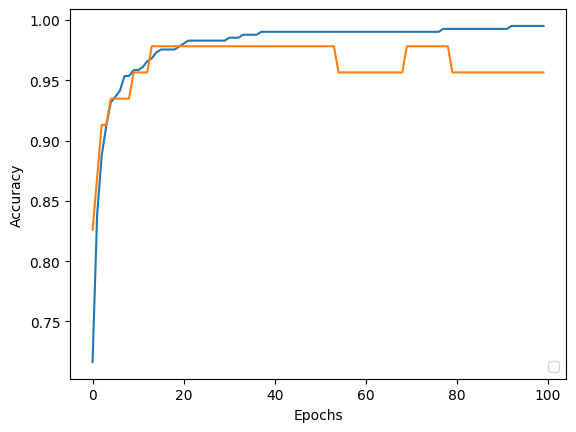

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['training_data'],['validation_data'],loc="lower right")
plt.show()

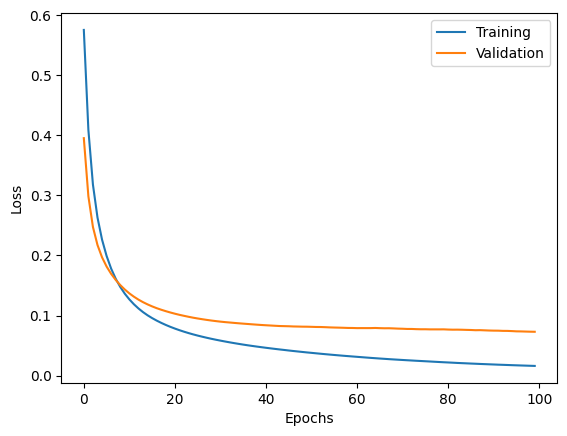

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
#Evaluating accuracy on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9595 - loss: 0.0845 
0.9561403393745422


In [ ]:
print(X_test.shape)
print(X_test[0])

(114, 30)
[-0.46649743 -0.13728933 -0.44421138 -0.48646498  0.28085007  0.04160589
 -0.11146496 -0.26486866  0.41524141  0.13513744 -0.02091509 -0.29323907
 -0.17460869 -0.2072995  -0.01181432 -0.35108921 -0.1810535  -0.24238831
 -0.33731758 -0.0842133  -0.2632354  -0.14784208 -0.33154752 -0.35109337
  0.48001942 -0.09649594 -0.03583041 -0.19435087  0.17275669  0.20372995]


In [ ]:
print (X_test)

[[-0.46649743 -0.13728933 -0.44421138 ... -0.19435087  0.17275669
   0.20372995]
 [ 1.36536344  0.49866473  1.30551088 ...  0.99177862 -0.561211
  -1.00838949]
 [ 0.38006578  0.06921974  0.40410139 ...  0.57035018 -0.10783139
  -0.20629287]
 ...
 [-0.73547237 -0.99852603 -0.74138839 ... -0.27741059 -0.3820785
  -0.32408328]
 [ 0.02898271  2.0334026   0.0274851  ... -0.49027026 -1.60905688
  -0.33137507]
 [ 1.87216885  2.80077153  1.80354992 ...  0.7925579  -0.05868885
  -0.09467243]]


In [ ]:
y_pred=model.predict(X_test)
print (y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[6.29296362e-01 1.70365557e-01]
 [1.17832875e-04 9.97964263e-01]
 [1.60026038e-03 9.49137092e-01]
 [9.95696962e-01 5.10776695e-03]
 [9.97659624e-01 1.16476917e-03]
 [1.32180446e-07 9.99998748e-01]
 [1.35819232e-06 9.99978185e-01]
 [1.38262630e-01 8.63202572e-01]
 [3.51870000e-01 2.62208462e-01]
 [9.80344892e-01 4.87406086e-03]
 [6.54933870e-01 8.52983147e-02]
 [6.44692630e-02 8.78264844e-01]
 [9.49642718e-01 1.95409358e-02]
 [1.83078527e-01 9.07818913e-01]
 [9.56746399e-01 5.61504764e-03]
 [1.18120924e-01 9.86959755e-01]
 [9.80678976e-01 5.66713139e-03]
 [9.99109983e-01 6.32808020e-04]
 [9.99512792e-01 6.65506232e-04]
 [1.05984589e-04 9.99531507e-01]
 [5.95740676e-01 9.56416726e-02]
 [9.61865306e-01 2.73088049e-02]
 [6.11326357e-07 9.99989152e-01]
 [9.80134666e-01 8.44958704e-03]
 [9.80705440e-01 6.03266759e-03]
 [9.92344737e-01 5.10501442e-03]
 [9.90503848e-01 3.14178248e-03]
 [9.78277266e-01 1.08680315e-02]
 [9.70164180e-01 1.61250774e-02]
 [1.3

model.predict() gives the predcition probability of each class for that data point

#converting the prediction probability to labels

In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print (y_pred_labels)

[0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]


Building the predictive system


In [ ]:
input_data=(12,15.65,76.95,443.3,0.09723,0.07165,0.04151,0.01863,0.2079,0.05968,0.2271,1.255,1.441,16.16,0.005969,0.01812,0.02007,0.007027,0.01972,0.002607,13.67,24.9,87.78,567.9,0.1377,0.2003,0.2267,0.07632,0.3379,0.07924
)
# change the input_data to a numpy array

input_data_as_numpy_array=np.asarray(input_data)
# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Benign')

else:
  print('The tumor is Malignant')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.9526299  0.01611803]]
[0]
The tumor is Benign


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
